In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Número de documentos
num_docs = 10

# Dimensionalidad original (por ejemplo, 100 dimensiones)
dim_original = 100

# Generar vectores aleatorios
np.random.seed(42)  # Para reproducibilidad
vectors = np.random.rand(num_docs, dim_original)

# Normalizar los vectores para que sean unitarios
vectors = normalize(vectors, norm='l2')


In [3]:
# Reducir a 2 dimensiones
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)


In [4]:
# Calcular la matriz de similitud
similarity_matrix = cosine_similarity(vectors)


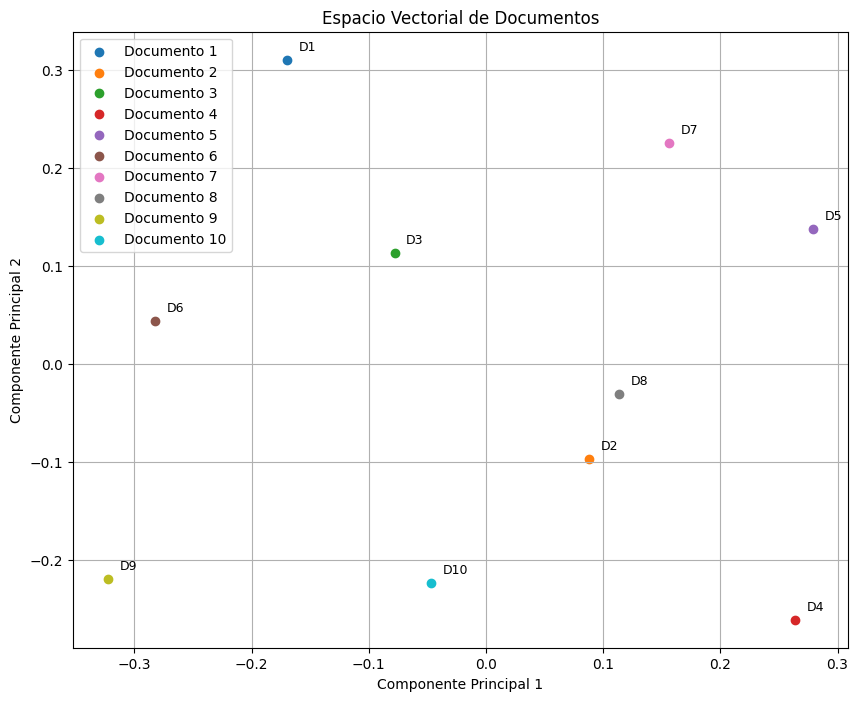

In [5]:
plt.figure(figsize=(10, 8))

# Graficar cada vector como un punto
for i in range(num_docs):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], label=f'Documento {i+1}')
    plt.text(vectors_2d[i, 0]+0.01, vectors_2d[i, 1]+0.01, f'D{i+1}', fontsize=9)

plt.title('Espacio Vectorial de Documentos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


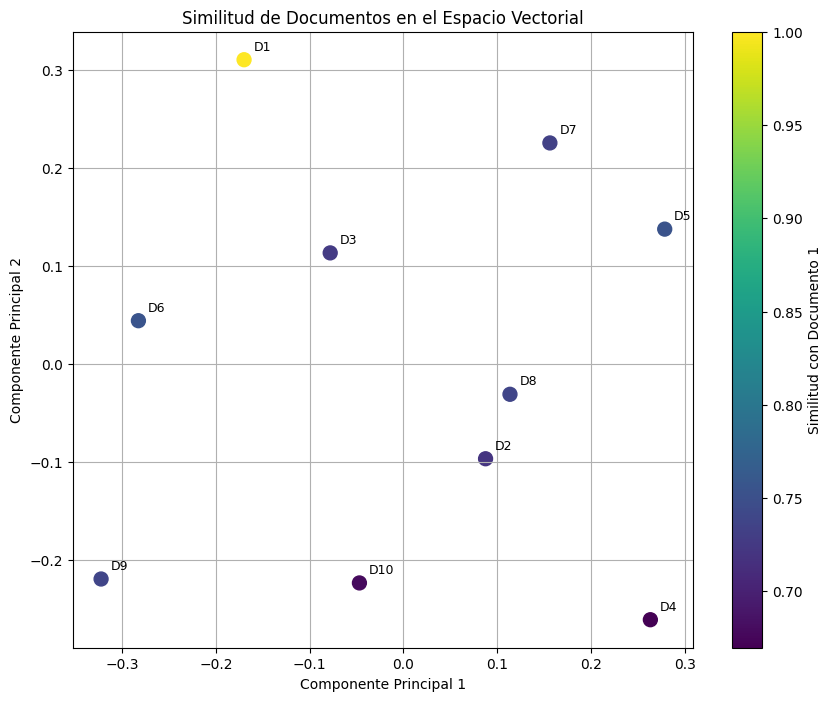

In [6]:
# Seleccionar un documento de referencia, por ejemplo, el primero
ref_doc = 0
similarities = similarity_matrix[ref_doc]

plt.figure(figsize=(10, 8))

# Graficar con colores basados en la similitud
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1],
                      c=similarities, cmap='viridis', s=100)

plt.colorbar(scatter, label='Similitud con Documento 1')
for i in range(num_docs):
    plt.text(vectors_2d[i, 0]+0.01, vectors_2d[i, 1]+0.01, f'D{i+1}', fontsize=9)

plt.title('Similitud de Documentos en el Espacio Vectorial')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [8]:
%pip install nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


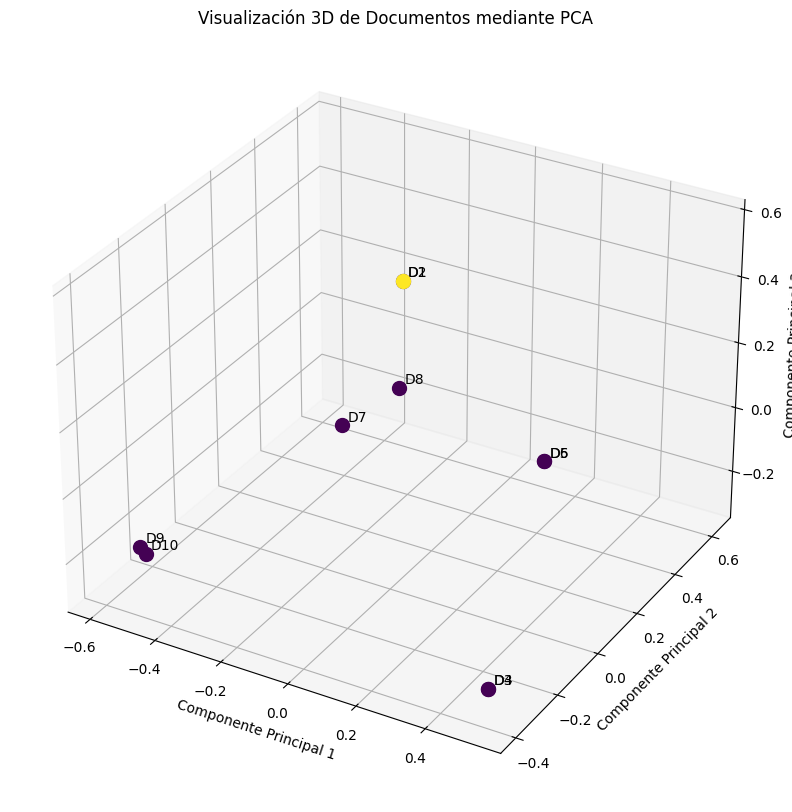

Matriz de Similitud Coseno entre Documentos:
[[1.   0.07 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.27 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.27 1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.24 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.24 1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.06 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.06 0.   1.   0.27]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.27 1.  ]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords

# Descargar stop words si no lo has hecho antes
nltk.download('stopwords')

# Lista de documentos simulados
documents = [
    "El análisis de datos es crucial en la ciencia moderna.",
    "La interpretación de datos juega un papel fundamental en la investigación científica.",
    "La inteligencia artificial está revolucionando la industria tecnológica.",
    "Los avances en inteligencia artificial impactan en la tecnología.",
    "Las energías renovables son esenciales para el futuro del planeta.",
    "La energía solar y eólica son pilares de las energías renovables.",
    "El cambio climático es un desafío global que requiere acción inmediata.",
    "La crisis climática demanda respuestas urgentes a nivel mundial.",
    "La economía global se ve afectada por eventos políticos y sociales.",
    "Los factores políticos y sociales influyen en la economía internacional."
]

# Obtener stop words en español
spanish_stop_words = stopwords.words('spanish')

# Vectorización TF-IDF con n-gramas
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    stop_words=spanish_stop_words,
    lowercase=True,
    norm='l2'
)
X_tfidf = vectorizer.fit_transform(documents)

# Aplicación de PCA con 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Cálculo de la matriz de similitud
similarity_matrix = cosine_similarity(X_tfidf)

# Visualización 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ref_doc = 0  # Documento de referencia
similarities = similarity_matrix[ref_doc]
colors = cm.viridis(similarities)

for i in range(len(documents)):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2],
               color=colors[i], s=100)
    ax.text(X_pca[i, 0]+0.01, X_pca[i, 1]+0.01, X_pca[i, 2]+0.01,
            f'D{i+1}', fontsize=10)

ax.set_title('Visualización 3D de Documentos mediante PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

# Mostrar matriz de similitud
print("Matriz de Similitud Coseno entre Documentos:")
print(np.round(similarity_matrix, 2))


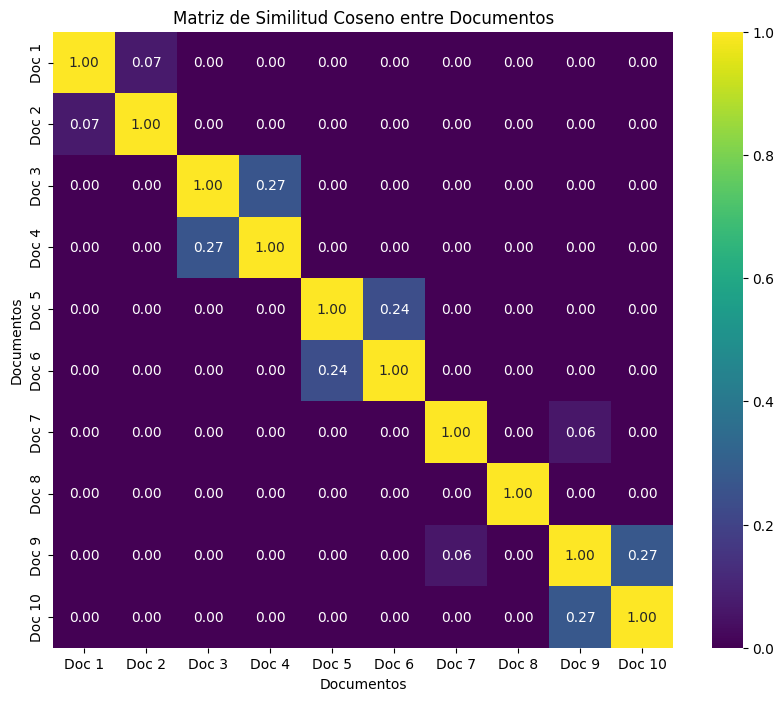

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional, pero recomendado para mejores gráficos

# Crear etiquetas para los documentos
document_labels = [f'Doc {i+1}' for i in range(len(documents))]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(similarity_matrix, xticklabels=document_labels, yticklabels=document_labels,
            cmap='viridis', annot=True, fmt=".2f")

# Configurar títulos y etiquetas
plt.title('Matriz de Similitud Coseno entre Documentos')
plt.xlabel('Documentos')
plt.ylabel('Documentos')

# Mostrar el gráfico
plt.show()
